NIM : 17210850

NAMA : ARI KURNIA P

Kelas : 17.5A.11

Matkul : Pengolahan Citra (P5)

In [ ]:
!pip install numpy

In [ ]:
!pip install opencv-python

In [ ]:
import numpy as np
import cv2

In [ ]:
# read input and convert to grayscale
img = cv2.imread('/content/drive/MyDrive/RosinSR3.jpg')

# do dft saving as complex output
dft = np.fft.fft2(img, axes=(0,1))

# apply shift of origin to center of image
dft_shift = np.fft.fftshift(dft)

# generate spectrum from magnitude image (for viewing only)
mag = np.abs(dft_shift)
spec = np.log(mag) / 20

# create circle mask
radius = 32
mask = np.zeros_like(img)
cy = mask.shape[0] // 2
cx = mask.shape[1] // 2
cv2.circle(mask, (cx,cy), radius, (255,255,255), -1)[0]

# blur the mask
mask2 = cv2.GaussianBlur(mask, (19,19), 0)

# apply mask to dft_shift
dft_shift_masked = np.multiply(dft_shift,mask) / 255
dft_shift_masked2 = np.multiply(dft_shift,mask2) / 255


# shift origin from center to upper left corner
back_ishift = np.fft.ifftshift(dft_shift)
back_ishift_masked = np.fft.ifftshift(dft_shift_masked)
back_ishift_masked2 = np.fft.ifftshift(dft_shift_masked2)


# do idft saving as complex output
img_back = np.fft.ifft2(back_ishift, axes=(0,1))
img_filtered = np.fft.ifft2(back_ishift_masked, axes=(0,1))
img_filtered2 = np.fft.ifft2(back_ishift_masked2, axes=(0,1))

# combine complex real and imaginary components to form (the magnitude for) the original image again
img_back = np.abs(img_back).clip(0,255).astype(np.uint8)
img_filtered = np.abs(img_filtered).clip(0,255).astype(np.uint8)
img_filtered2 = np.abs(img_filtered2).clip(0,255).astype(np.uint8)

Original


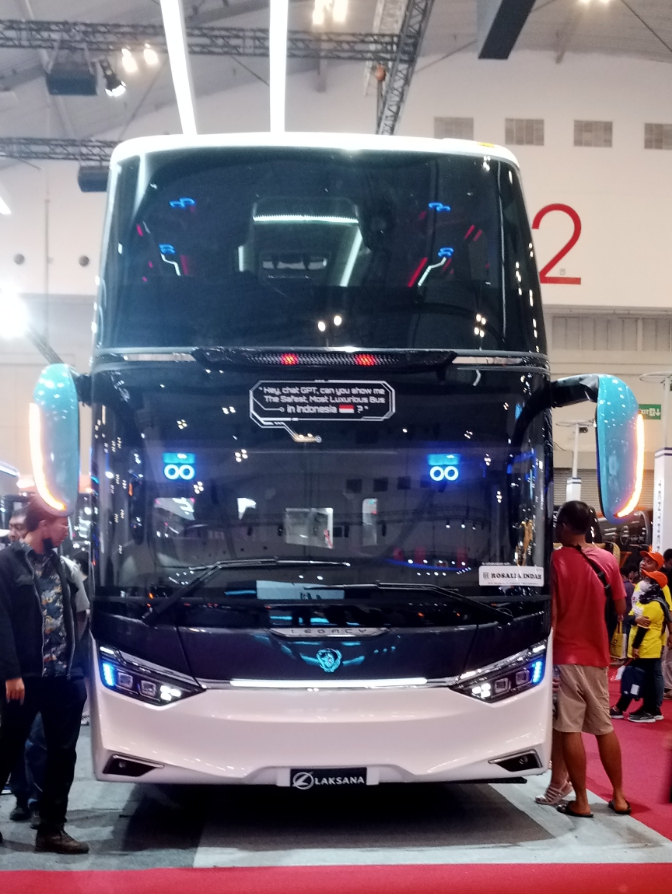

Spectrum


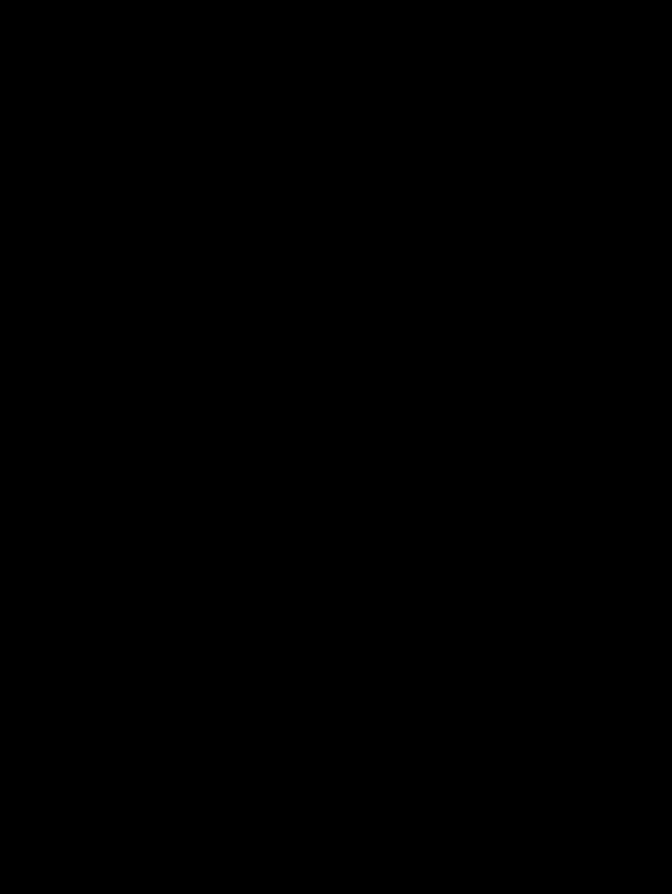

mask 1


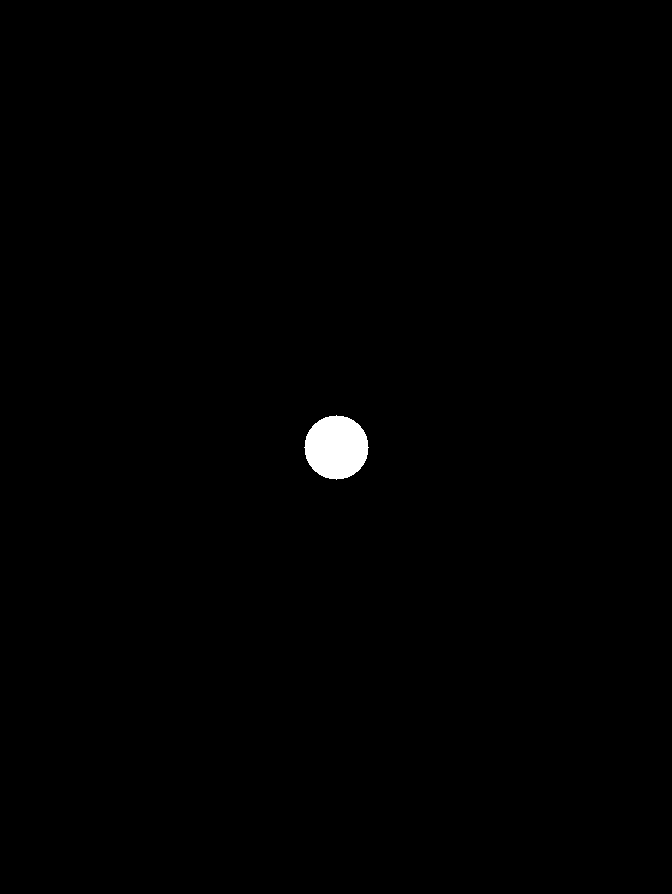

mask 2


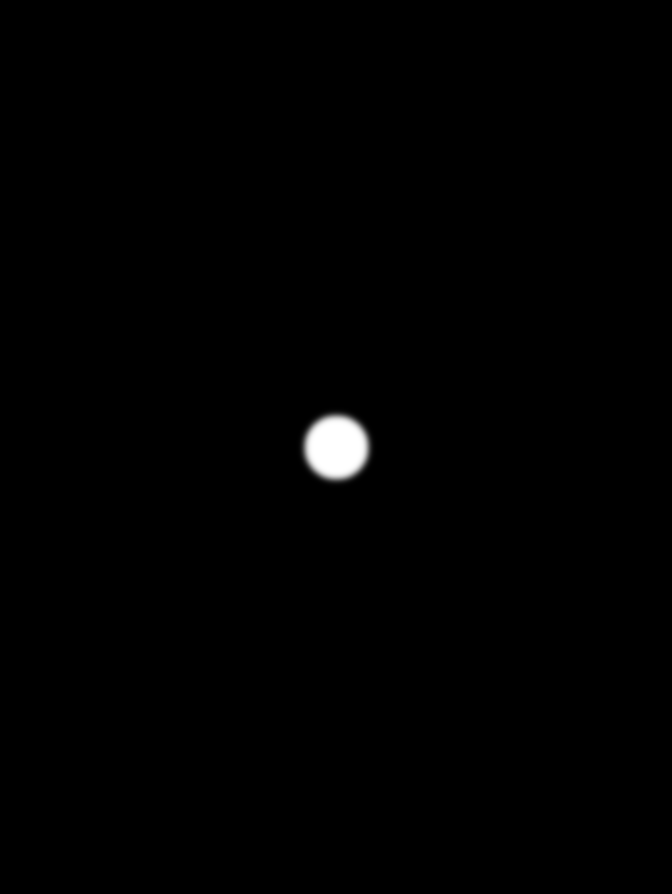

ORIGINAL DFT/IFT ROUND TRIP


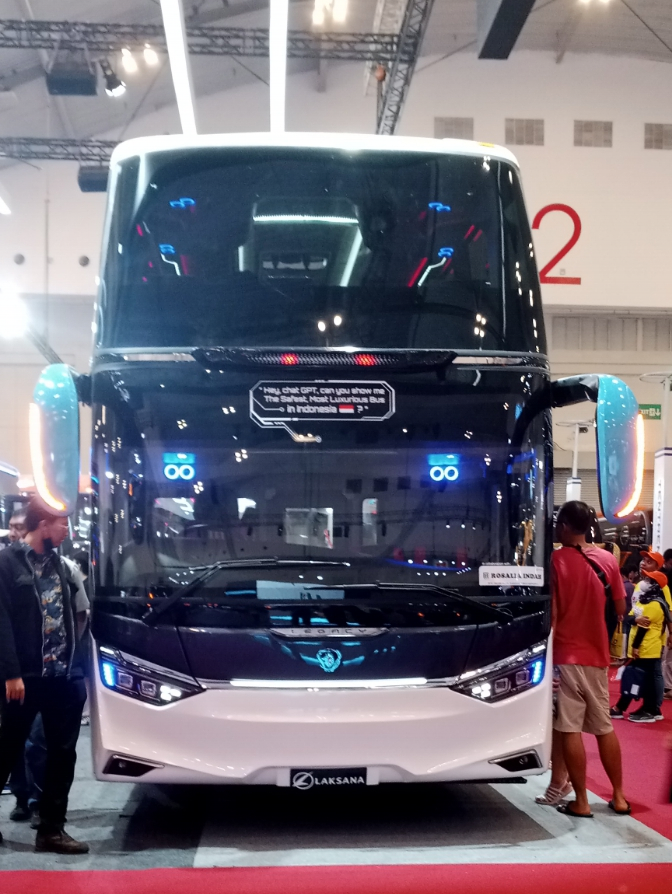

FILTERED 1 DFT/IFT ROUND TRIP


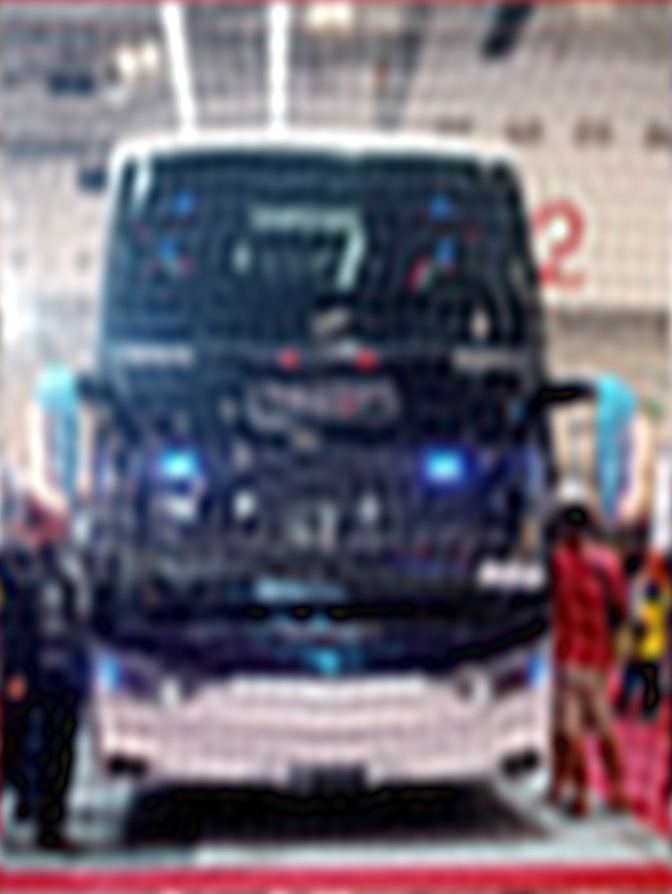

FILTERED 2 DFT/IFT ROUND TRIP


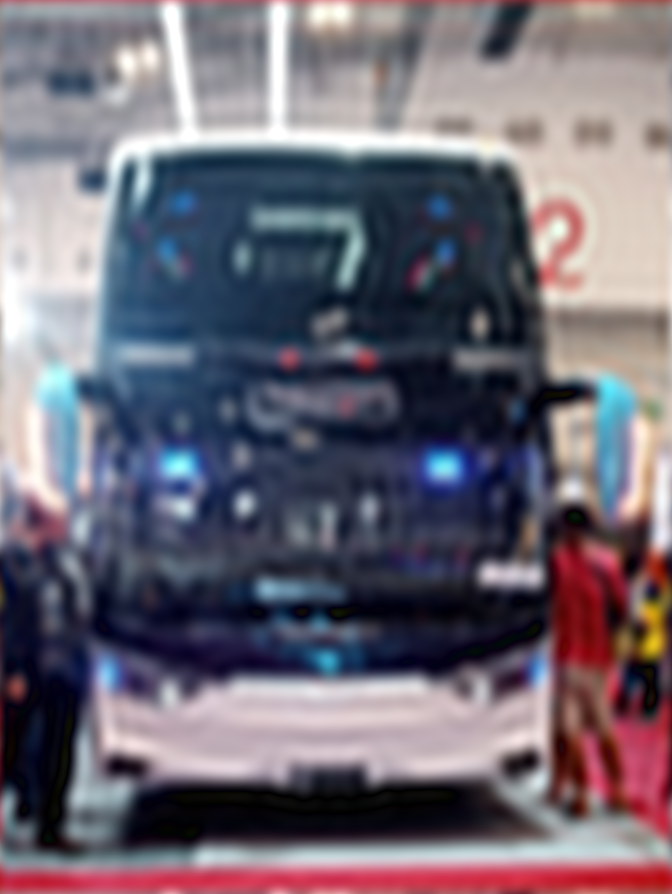

In [11]:
from google.colab.patches import cv2_imshow
print("Original")
cv2_imshow(img)
print("Spectrum")
cv2_imshow(spec)
print("mask 1")
cv2_imshow(mask)
print("mask 2")
cv2_imshow(mask2)
print("ORIGINAL DFT/IFT ROUND TRIP")
cv2_imshow(img_back)
print("FILTERED 1 DFT/IFT ROUND TRIP")
cv2_imshow(img_filtered)
print("FILTERED 2 DFT/IFT ROUND TRIP")
cv2_imshow(img_filtered2)
cv2.waitKey(0)
cv2.destroyAllWindows()